**Connect to GPU/TPU**
    - Settings -> GPU
  - Note: Once code is execution is done disconnect gpu/tpu

In [70]:
# Checking GPU Connection After Connecting

!nvidia-smi

Fri Sep 26 11:19:19 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.35.03              Driver Version: 560.35.03      CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   72C    P0             33W /   70W |    3113MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

### Following Pipeline

### **1. Data** - X & y
- **Got Available DataSet from onoline Sources **
  - Data Available in Train-Valid-Test folders with both images and labels

**Data Validation**

In [71]:
# Modules
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [72]:
# Changing Working Directory to Input
os.chdir("/kaggle/input/necklace-classification")

In [73]:
os.listdir()

['README.dataset.txt',
 'README.roboflow.txt',
 'data.yaml',
 'valid',
 'test',
 'train']

In [75]:
len(os.listdir("train/images"))

111

In [76]:
len(os.listdir("train/labels"))

111

#### Validating Images along with .txt files

* In the folder checking each image file is having .txt file
* Removing irregualr files in both images and labels folder

**train**

In [77]:
images = [image.strip(".jpg") for image in os.listdir("train/images")] # image names
images[0:5]

['c8a6288e-32c6-471b-a520-163ec65f6701_jpg.rf.3b5e446e04e206aa87213c5231687b55',
 'A-gorgeous-trio-of-cultured-freshwater-pearls-is-_jpg.rf.2f33d8b62c0d7ae11bdcc8541900e598',
 'download-65-_jpg.rf.6902a99ac652600fa5df843f9fea28e6',
 'images-18-_jpg.rf.12d82e01905638cb66d8dbae8fa1e492',
 'download-19-_jpg.rf.abdb8990e99655f71bb5455f7db2663d']

In [78]:
labels = [label.strip(".txt") for label in os.listdir("train/labels")] # label names
labels[0:5]

['f1916e33-e203-4af7-9545-37ba4a308028_jpg.rf.7b00288e72144b2bb17c6241c7ef0a16',
 'images-7-_jpg.rf.7efa46900bfa8290da98c1d0a6dd2091',
 'images-45-_jpg.rf.5c9d14ad0f1e0ca5d4315e235c7ffd3f',
 'WhatsApp-Image-2025-09-12-at-15_36_44-1-_jpeg.rf.72b374ebc4c6b26e2648a1d63eb25e51',
 'An-antique-pearl-and-diamond-necklace-European-_jpg.rf.f96b204f3bd638161b4a4e3f8056c3d9']

In [79]:
set(images).symmetric_difference(set(labels))

set()

* There are no mismacthed files
    - if mismatched files found drop them in both images & labels
      - Also, Yolo by default will not consider these mismatched files while training

* **For the collected Images We have Below Classes in Labels**

    * Class names: **['pendant','pearl','choaker','chain']**
    * Above comes with Annotations

* **Sample Image & Label**

In [80]:
os.listdir("train/images")[0:5]

['c8a6288e-32c6-471b-a520-163ec65f6701_jpg.rf.3b5e446e04e206aa87213c5231687b55.jpg',
 'A-gorgeous-trio-of-cultured-freshwater-pearls-is-_jpg.rf.2f33d8b62c0d7ae11bdcc8541900e598.jpg',
 'download-65-_jpg.rf.6902a99ac652600fa5df843f9fea28e6.jpg',
 'images-18-_jpg.rf.12d82e01905638cb66d8dbae8fa1e492.jpg',
 'download-19-_jpg.rf.abdb8990e99655f71bb5455f7db2663d.jpg']

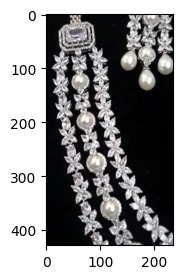

Necklace: choaker


In [81]:
# Image
sampleimg = mpimg.imread("/kaggle/input/necklace-classification/train/images/079f9b6dd18e045e2f23f7ca80a4bb51_jpg.rf.6091694394e6414f8fbc16cd1c858d95.jpg")
plt.figure(figsize=(3,3))
plt.imshow(sampleimg)
plt.show()

# Annotation
sampleannotfile = open("/kaggle/input/necklace-classification/train/labels/079f9b6dd18e045e2f23f7ca80a4bb51_jpg.rf.6091694394e6414f8fbc16cd1c858d95.txt")
indx = int(sampleannotfile.readlines()[0].split()[0].strip())

# We have Classes
classes = ['pendant','pearl','choaker','chain']
print("Necklace:", classes[indx])

### 2. Creation of config file (yaml) for training

* We need to create a file for the training , which contains the path of images along with labels

* file name extension should be **.yaml**

* refer & edit the **data.yaml** file given according to your project

In [82]:
import yaml

In [83]:
import yaml

data = {
    'train': '/kaggle/input/necklace-classification/train',
    'val': '/kaggle/input/necklace-classification/valid',
    'test': '/kaggle/input/necklace-classification/test',  # optional
    'nc': 4,   
    'names': ['Chain', 'Choaker', 'Pearl', 'Pendant']
}

# Save to /kaggle/working
with open('/kaggle/working/necklace.yaml', 'w') as f:
    yaml.dump(data, f, default_flow_style=False)

print("✅ data.yaml created at /kaggle/working/necklace.yaml")

✅ data.yaml created at /kaggle/working/necklace.yaml


In [84]:
os.listdir()

['README.dataset.txt',
 'README.roboflow.txt',
 'data.yaml',
 'valid',
 'test',
 'train']

### 3. Modeling

In [85]:
#### Module Installation

!pip install ultralytics

In [86]:
# Importing Yolo

from ultralytics import YOLO

* **Downloaded yolov11 pretrained weights file yolov11n.pt from github**

In [87]:

model = YOLO("/kaggle/input/yolo-pt/yolo11n.pt")  # loading weights of a pretrained model (recommended for training)

* **Training Model with Data**

In [88]:
# Training Model

# Using train method with .yaml , epochs and hyp params

# Train
model.train(
    data="/kaggle/input/necklace-classification/data.yaml",
    epochs=50,
    imgsz=640,
    project="/kaggle/working",   # ✅ Force saving to working dir
    name="necklacedetection"           # ✅ Subfolder inside working
)

# Check for file path errors if any in data.yaml

Ultralytics 8.3.203 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/input/necklace-classification/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=/kaggle/input/yolo-pt/yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=necklacedetection5, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=T

WARNING ⚠️ Download failure, retrying 2/3 https://github.com/ultralytics/assets/releases/download/v8.3.0/yolo11n.pt...


curl: (23) Failure writing output to destination



WARNING ⚠️ Download failure, retrying 3/3 https://github.com/ultralytics/assets/releases/download/v8.3.0/yolo11n.pt...


curl: (23) Failure writing output to destination



WARNING ⚠️ AMP: checks skipped. Offline and unable to download YOLO11n for AMP checks. Setting 'amp=True'. If you experience zero-mAP or NaN losses you can disable AMP with amp=False.
train: Fast image access ✅ (ping: 0.4±0.1 ms, read: 117.6±114.4 MB/s, size: 50.1 KB)
train: Scanning /kaggle/input/necklace-classification/train/labels... 111 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 111/111 1.0Kit/s 0.1s<0.0s
WARNING ⚠️ train: Cache directory /kaggle/input/necklace-classification/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


curl: (23) Failure writing output to destination



val: Fast image access ✅ (ping: 0.4±0.1 ms, read: 105.9±23.2 MB/s, size: 58.0 KB)
val: Scanning /kaggle/input/necklace-classification/valid/labels... 31 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 31/31 977.5it/s 0.0s
WARNING ⚠️ val: Cache directory /kaggle/input/necklace-classification/valid is not writeable, cache not saved.
Plotting labels to /kaggle/working/necklacedetection5/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /kaggle/working/necklacedetection5
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
       1/50      2.84G       1.68       3.47      2.136         44        640: 100% ━━━━

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all         31         35      0.367      0.494      0.449      0.281
                 Chain          2          2          0          0      0.133     0.0746
               Choaker         12         12      0.702       0.75      0.685      0.445
                 Pearl         12         12      0.531      0.473       0.56      0.351
               Pendant          9          9      0.235      0.751      0.419      0.253
Speed: 0.2ms preprocess, 2.4ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to /kaggle/working/necklacedetection5


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a2956de5750>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0

* **Evaluations**

In [89]:
metrics = model.val()  # evaluate model performance on the validation set

Ultralytics 8.3.203 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,932 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 57.9±53.1 MB/s, size: 26.1 KB)
val: Scanning /kaggle/input/necklace-classification/valid/labels... 31 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 31/31 1.0Kit/s 0.0s
WARNING ⚠️ val: Cache directory /kaggle/input/necklace-classification/valid is not writeable, cache not saved.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 2/2 1.9it/s 1.1s1.7s


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all         31         35      0.367      0.496      0.449      0.281
                 Chain          2          2          0          0      0.133     0.0746
               Choaker         12         12      0.699       0.75      0.686      0.445
                 Pearl         12         12      0.531      0.474      0.562      0.351
               Pendant          9          9      0.237      0.759      0.417      0.252
Speed: 0.2ms preprocess, 9.4ms inference, 0.0ms loss, 2.7ms postprocess per image
Results saved to /kaggle/working/necklacedetection52


* **Prediction on Single Image**

In [90]:
model.predict('/kaggle/input/necklace-classification/train/images/079f9b6dd18e045e2f23f7ca80a4bb51_jpg.rf.6091694394e6414f8fbc16cd1c858d95.jpg', save=True, imgsz=640, conf=0.3)


image 1/1 /kaggle/input/necklace-classification/train/images/079f9b6dd18e045e2f23f7ca80a4bb51_jpg.rf.6091694394e6414f8fbc16cd1c858d95.jpg: 640x352 1 Pearl, 10.3ms
Speed: 2.1ms preprocess, 10.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 352)
Results saved to /kaggle/working/necklacedetection53


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'Chain', 1: 'Choaker', 2: 'Pearl', 3: 'Pendant'}
 obb: None
 orig_img: array([[[  8,   9,   7],
         [  8,   9,   7],
         [  8,   9,   7],
         ...,
         [  7,   7,   7],
         [  0,   0,   0],
         [  0,   0,   0]],
 
        [[  8,   9,   7],
         [  8,   9,   7],
         [  8,   9,   7],
         ...,
         [ 17,  17,  17],
         [ 12,  12,  12],
         [  4,   4,   4]],
 
        [[  8,   9,   7],
         [  8,   9,   7],
         [  8,   9,   7],
         ...,
         [  9,   9,   9],
         [ 10,  10,  10],
         [  7,   7,   7]],
 
        ...,
 
        [[  1,   1,   1],
         [  1,   1,   1],
         [  1,   1,   1],
         ...,
         [140, 136, 135],
         [168, 164, 163],
         [194, 190, 189]],
 
        [[  1,   1,   1],
         [  1,   1,   1],
         [  1,   1,

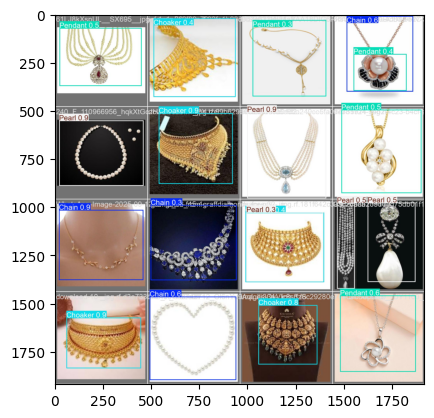

In [92]:
# Loading Predicted Image (Check Save Dir in Above Prediction)
sampleimg = mpimg.imread("/kaggle/working/necklacedetection22/val_batch0_pred.jpg")
plt.imshow(sampleimg)

**Download Trained Best Weight from the path given above**

model.save('/kaggle/working/necklacedetection/weights.pt')

* **Work on 30 Sec Video related to Task**

model.predict('/content/sp.mp4', save=True, imgsz=640, conf=0.3)

#### Further Notes:
- To imporove model performance, adjust epochs, imgsize, confidence values and other hyp params
- With downloaded best.pt work on model deployment.